In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from scipy.integrate import quad
#from astropy.cosmology import Planck15   # You can choose a different cosmology if needed
import astropy.units as u
from astropy import constants as const
from astropy.cosmology import FlatLambdaCDM
from numba import jit
from tqdm import tqdm

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
def free_fall():
    return 10**3

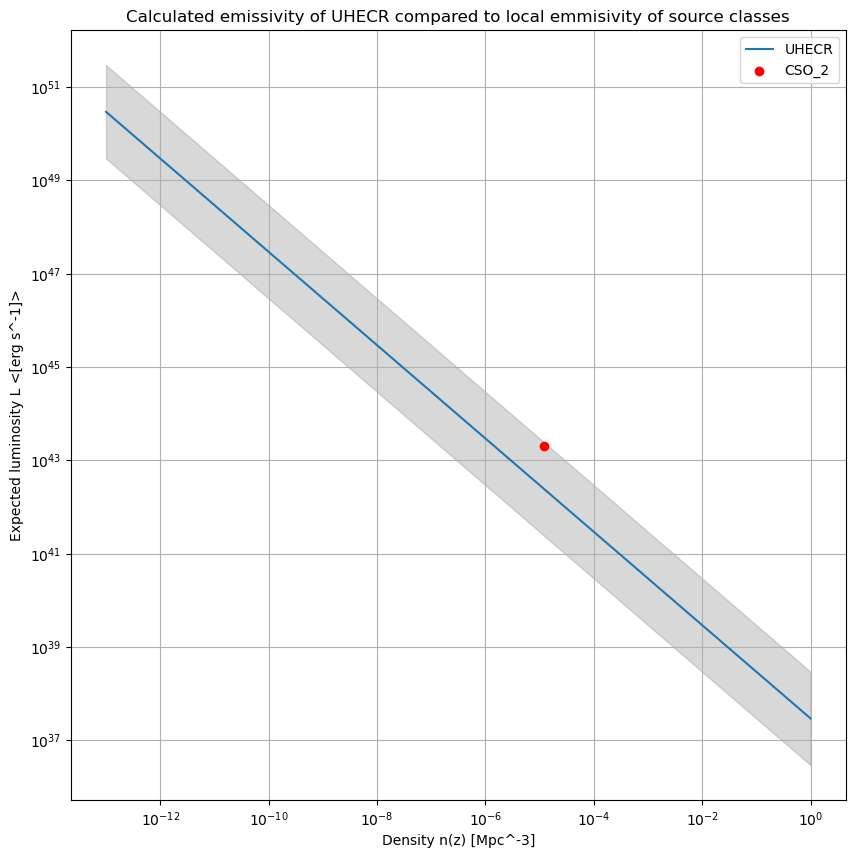

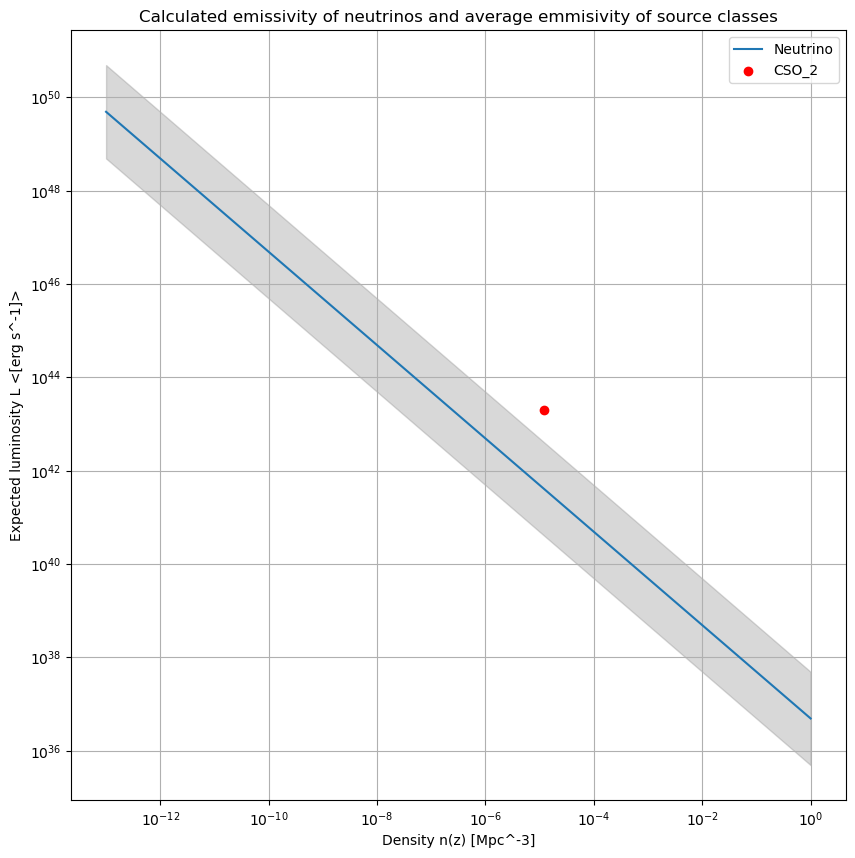

In [5]:
# checking total power output of CSO 2s in x-ray comapred to UHECRS emissivity and neut emissions

CSO_luminosity = 2*10**43
CSO_number_density = 1.2*10**-5

L_neut =1.5466374965712159e+44#1.5466374965712159e+44*np.pi*4

# Define the value of n
n_values = np.logspace(-13, 0, 1000)

# Calculate the corresponding values of L # 9.268568906534487e+44
L_values = (9.268568906534487e+44) / n_values/(60*60*24*365)
L_values_2 = (L_neut)/ n_values/(60*60*24*365)

radius = 10

y_upper = L_values*radius
y_lower = L_values/radius

y_upper_2 = L_values_2*radius
y_lower_2 = L_values_2/radius

# Plot the line
plt.figure(1, figsize=(10,10))
plt.plot(n_values, L_values, label = "UHECR")
plt.fill_between(n_values, y_lower, y_upper, color='gray', alpha=0.3)
#plt.plot(n_values, L_values_2, label = "Neutrino")

# Add labels and title
plt.xlabel('Density n(z) [Mpc^-3]')
plt.yscale('log',base=10)
plt.xscale('log',base=10)
plt.scatter(CSO_number_density, CSO_luminosity, label = "CSO_2", color = 'red')
plt.ylabel('Expected luminosity L <[erg s^-1]>')
plt.title('Calculated emissivity of UHECR compared to local emmisivity of source classes')
plt.legend()
plt.grid()
plt.savefig('C:/Users/henri/OneDrive/Documents/NTNU/Semester 10/Masteroppgave/Plots/L_n_uhecr_calc_cso.png')


plt.figure(2, figsize=(10,10))
#plt.plot(n_values, L_values, label = "UHECR")

plt.plot(n_values, L_values_2, label = "Neutrino")
plt.fill_between(n_values, y_lower_2, y_upper_2, color='gray', alpha=0.3)
plt.scatter(CSO_number_density, CSO_luminosity, label = "CSO_2", color = 'red')
# Add labels and title
plt.xlabel('Density n(z) [Mpc^-3]')
plt.yscale('log',base=10)
plt.xscale('log',base=10)
plt.ylabel('Expected luminosity L <[erg s^-1]>')

plt.title('Calculated emissivity of neutrinos and average emmisivity of source classes')
plt.legend()
plt.grid()



plt.savefig('C:/Users/henri/OneDrive/Documents/NTNU/Semester 10/Masteroppgave/Plots/L_n_neut_calc_cso.png')
# Show the plot
plt.show()

154283849999999.97


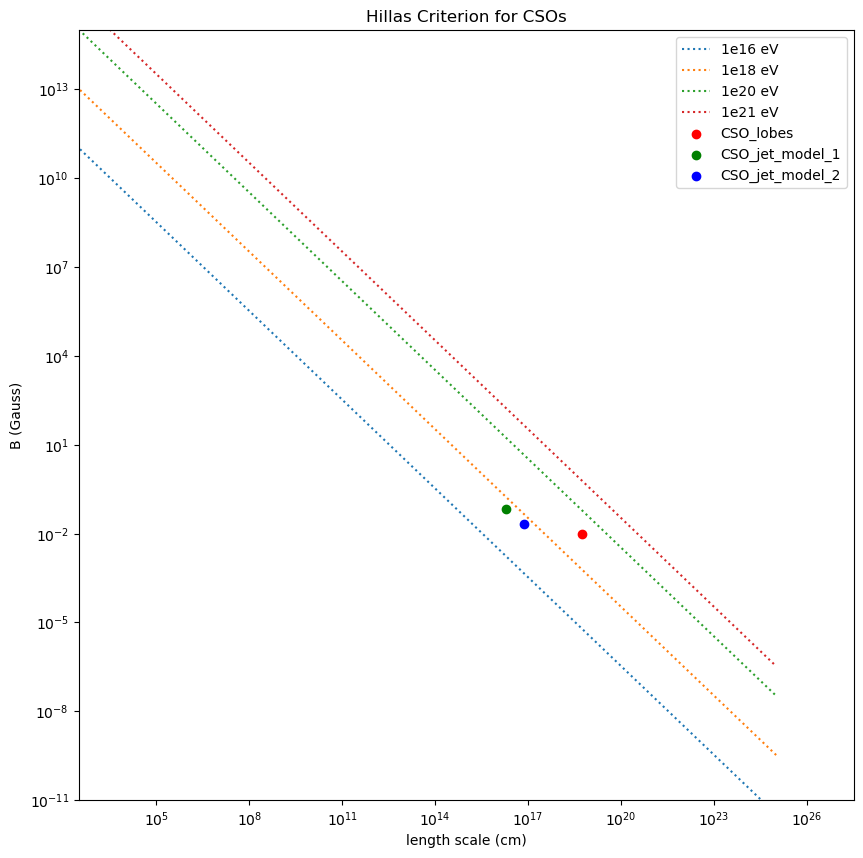

In [6]:


# Define the Hillas criterion function
def hillas_criterion(B, L,Z):
    return Z*B*L

data = np.loadtxt('C:/Users/henri/OneDrive/Documents/NTNU/Semester 10/Masteroppgave/Hillas_points.csv', delimiter=',', skiprows=1)

B_field_CSO_lobes = 10**(-2) #gauss
Size_CSO_lobes = 10**18.74  #cm

B_field_CSO_jet_model_1 = 67*10**(-3) #gauss
Size_CSO_jet_model_1 = 10**16.3  #cm

B_field_CSO_jet_model_2 =21*10**(-3) #gauss
Size_CSO_jet_model_2 = 10**16.88  #cm

# Define the magnetic field strengths (in Gauss) for each source
# Define the proton energies (in eV) for the dotted lines
proton_energies = np.array([1.0e16, 1.0e18, 1.0e20,1.0e21])

R_values = np.logspace(1, 25, 1000) #cm 
c = 3*10**8
B_values_1 = proton_energies[0]/R_values/c*10**6 #conversion to gauss and to cm
B_values_2 = proton_energies[1]/R_values/c*10**6
B_values_3 = proton_energies[2]/R_values /c*10**6
B_values_4 = proton_energies[3]/R_values/c*10**6

print(10*10**(-6)*5*3.085677*10**18)
# Define the characteristic length scales (in meters) for each source
#print(hillas_criterion(B_values_1,R_values,1))
# Plot the Hillas criterion for each source
plt.figure(figsize=(10, 10))
plt.plot(R_values, B_values_1, label = '1e16 eV', linestyle = 'dotted')
plt.plot(R_values, B_values_2, label = '1e18 eV', linestyle = 'dotted')
plt.plot(R_values, B_values_3, label = '1e20 eV', linestyle = 'dotted')
plt.plot(R_values, B_values_4, label = '1e21 eV', linestyle = 'dotted')
#plt.scatter(data[:,0],data[:,1],label = "check  points")
plt.scatter(Size_CSO_lobes, B_field_CSO_lobes, label = "CSO_lobes", color = 'red') 
plt.scatter(Size_CSO_jet_model_1, B_field_CSO_jet_model_1, label = "CSO_jet_model_1", color = 'green')
plt.scatter(Size_CSO_jet_model_2, B_field_CSO_jet_model_2, label = "CSO_jet_model_2", color = 'blue')
# Add labels and title
plt.xlabel('length scale (cm)')
plt.ylabel('B (Gauss)')
plt.title('Hillas Criterion for CSOs')
plt.xscale('log')
plt.xlim(10**2.5, 10**27.5)
plt.ylim(10**-11, 10**15)
plt.yscale('log')
plt.legend()

# Add ticks for known scales
#plt.xticks([1, 10**13, 10**18, 10**23], ['1 cm', '1 AU', '1 pc', '1 Mpc'])
#plt.yticks(np.logspace(-11, 16, num=10))

#plt.savefig('C:/Users/henri/OneDrive/Documents/NTNU/Semester 10/Masteroppgave/Plots/Hillas_criterion_CSO.png')

# Show the plot
plt.show()


In [7]:
def p_max(eta_f, R_fs, u_1, B):
    return eta_f/0.1 *R_fs/1* u_1/10**8 * B/10**-6 *10**3 #GeVc^-1
a = p_max(0.1, 2, 0.4*3*10**10, 10*10**-3)


def format_number(number):
    return "{:.2e}".format(number)

b = format_number(a)
print(b)


2.40e+09


5e+42


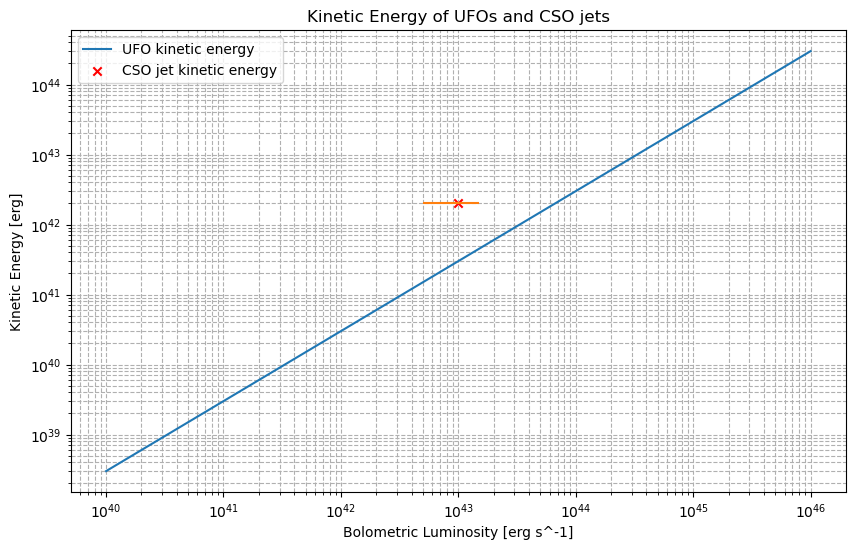

In [8]:
lum_bol = np.logspace(40, 46, 1000).astype(float)
UFO_kinetic = (0.03*lum_bol).astype(float)
CSO_jet_kin = np.array(2*10**42,dtype=float)
lum_CSO_bol = np.array(10**43,dtype=float) #conservative
lum_CSO_bol_e = float(0.5*lum_CSO_bol) #conservative
print(lum_CSO_bol_e)
plt.figure(figsize=(10, 6))
plt.loglog(lum_bol, UFO_kinetic, label='UFO kinetic energy')
plt.scatter(lum_CSO_bol, CSO_jet_kin, label='CSO jet kinetic energy', color = 'red',marker = 'x')
plt.errorbar(lum_CSO_bol, CSO_jet_kin, xerr=lum_CSO_bol_e)
plt.xlabel('Bolometric Luminosity [erg s^-1]')
plt.ylabel('Kinetic Energy [erg]')
plt.title('Kinetic Energy of UFOs and CSO jets')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.savefig('C:/Users/henri/OneDrive/Documents/NTNU/Semester 10/Masteroppgave/Plots/Kinetic_energy_UFO_CSO.png')
plt.show()



In [9]:
from astropy.cosmology import Planck15
from astropy import units as u
#Constants

B = 10**-2 #gauss
Energy_proton = np.logspace(12, 21, 100).astype(float)

c= 3*10**10 #cm/s
m_e = 9.11*10**-28 #g
m_p = 1.67*10**-24 #g
e = 4.8032*10**-10 #cm^3/2 g^1/2 s^-1
eta = 1  # Dimensionless, example value
c = const.c.cgs.value
m_e = const.m_e.cgs.value
m_p = const.m_p.cgs.value
e = const.e.esu.value

ev_to_erg =1/(6.242*10**11)


print(ev_to_erg)
redshift = 0.02  # Replace with your desired redshift value

distance = Planck15.luminosity_distance(redshift).to('Mpc')

print(distance)



# Print the unit in words
#print(unit.to_string(format=))

1.6020506247997437e-12
89.86279542776937 Mpc


In [9]:

# Given values
E = 1e12 * u.eV  # Example value
print(E)
eta = 1  # Dimensionless, example value
#B = 1 * u.dyn**(0.5)/u.cm  # 1 gauss, example value
print(B.decompose())
print(const.e.esu)
# Constants
ev_to_erg = u.eV.to(u.erg)  

print(ev_to_erg)

e = const.e.esu.value  # Elementary charge in esu

# Your equation (assuming the '3*10**10' factor is the speed of light in cm/s in CGS units)
result = E.to(u.erg) * eta / (B * 3 *const.c.cgs*const.e.esu)
#E*ev_to_erg*eta/(B*3*10**10*e)
print(result.decompose(bases = u.cgs.bases))

unit = u.m


1000000000000.0 eV


AttributeError: 'float' object has no attribute 'decompose'

In [10]:
### time scales

def t_dyn(R, u_1):
    return R/u_1 #sec

def r_d(t_var):
    return t_var*3*10**10 #cm 

t_var = 10*365*24*60*60 #timescale of 10 years
R = r_d(t_var)
print(format_number(R)) #ish 1 parsec
#R = 1e17 Foteini values
dynamical_time = t_dyn(R, c)

dynamical_time_2 = t_dyn(10**18.74, 3*10**10)


9.46e+18


In [11]:
##t_acc 


def t_acc(E, eta, B,e):
    
    return E*ev_to_erg*eta/(B*c*e) #sec

acceleration_time = t_acc(Energy_proton, 1, B, e)


In [12]:
##t_syn
def t_syn(E, B,m_p,m_e, sigma_T,c):
    return 6*np.pi*m_p**4*c**3/(m_e**2*sigma_T*B**2*E*ev_to_erg) #sec

def sigma_t(m_e,c):
    return 8*np.pi/3*((e**2)/(m_e*c**2))**2


sigma_T = sigma_t(m_e,c)
print(sigma_T)
synchrotron_time = t_syn(Energy_proton, B,m_p,m_e, sigma_T,c)

6.652458724930067e-25


In [13]:
from scipy.integrate import dblquad
import numpy as np
## t_py, pion production time
def inelastisity (E):
    if E<980*m_e*c**2 and E>390*m_e*c**2:
        return 0.2
    elif E>980*m_e*c**2:
        
        return 0.6
    else:
        return 0
    
def cross_section_py (E):
    if E<980*m_e*c**2 and E>390*m_e*c**2:
       
        return 340*10**-30 #microb, i think this could be wrong. 
    elif E>980*m_e*c**2:
        return 120*10**-30  #microb cm^-2
    else:
        return 0
    
############################  List of integrands that represent the same function but with some variable change
    

def integrand(eta_t, eta_gamma,r_b,L_eps,gamma_p): #original
  
    #print(f"eta_t: {eta_t}, eta_gamma: {eta_gamma/(2*gamma_p)}")
    return  eta_t**(-2)*n_eps_t_2(eta_t, r_b,L_eps)*eta_gamma*inelastisity(eta_gamma)*cross_section_py(eta_gamma)

def integrand_2(eta_t, eta_gamma,r_b,L_eps,gamma_p): #make it logaritmic to avoid numerical errors
    return np.exp(eta_t)*np.exp(eta_gamma)*integrand(np.exp(eta_t), np.exp(eta_gamma),r_b,L_eps,gamma_p)



def integrand_3(eta_gamma, eta_t,r_b,L_eps,gamma_p): # integral swithced around
    return  eta_t**(-2)*n_eps_t_2(eta_t, r_b,L_eps)*eta_gamma*inelastisity(eta_gamma)*cross_section_py(eta_gamma)

def integrand_4(eta_gamma, eta_t,r_b,L_eps,gamma_p): # logaritmic to avoid numerical errors
    
    return  np.exp(eta_t)*np.exp(eta_gamma)*integrand_3(np.exp(eta_gamma), np.exp(eta_t),r_b,L_eps,gamma_p)

def integrand_5(eta_gamma, eta_t,r_b,L_eps,gamma_p): #integral swithced around and logaritmic to avoid numerical errors and another variable change y = e_t * gamma_p
    
    return  np.exp(eta_t)*np.exp(eta_gamma)*integrand_3(np.exp(eta_gamma), np.exp(eta_t)/gamma_p,r_b,L_eps,gamma_p)




########################

def n_eps_t_2(eps_t, r_b,L_eps): #Here i change r based on the energy of the proton, when it comes to it. 
    return 3*L_eps/(4*np.pi*r_b**2*eps_t**2*c) #

def epsilon_r(eps, gamma_p):
    beta = np.sqrt(1-1/gamma_p**2)
    return eps*gamma_p#*(1-np.cos(theta)*beta), avg_theta = 0 




def t_py(E,r_b,L_eps):
    E_p = E*ev_to_erg
    #print(format_number(980*m_e*c**2/ev_to_erg), format_number(390*m_e*c**2/ev_to_erg))
    gamma_p = E_p/(m_p*c**2)
    #print(gamma_p)
    inf = 5e11 *ev_to_erg#/(m_e*c**2)
    bl = 145*10**6*ev_to_erg
    #print(bl, inf)
    #print(bl/(2*gamma_p), inf)
    
    #result, error = dblquad(integrand_3, bl/(2*gamma_p), inf, lambda x: bl, lambda x : x*2*gamma_p, args=(r_b,L_eps,gamma_p,)) #, one paper 
    result, error = dblquad(integrand_4, np.log(bl/(2*gamma_p)), np.log(inf), lambda x: np.log(bl), lambda x : x+np.log(2*gamma_p), args=(r_b,L_eps,gamma_p,), epsabs=1.49e-4, epsrel=1.49e-4) #second paper
    #result, error = dblquad(integrand_2, np.log(bl), np.log(inf), lambda x: np.log(bl)-np.log(gamma_p*2),  np.log(inf), args=(r_b,L_eps,gamma_p,), epsabs=1.49e-4, epsrel=1.49e-4) #foteini paper
    #result, error = dblquad(integrand_5, np.log(bl/(2*gamma_p)), np.log(inf), lambda x: np.log(bl), lambda x : x+np.log(2), args=(r_b,L_eps,gamma_p,), epsabs=1.49e-4, epsrel=1.49e-4) 

    print(result, error)
    pion_timescale = c/(2*gamma_p**2)*result
    return pion_timescale





#photo_pion_time = []
#for E_i in Energy_proton:
    #photo_pion_time.append(t_py(E_i,R, 10**43))

#photo_pion_time = np.array(photo_pion_time)







0.25
0.0008010253123998718
0.0007368395199141498


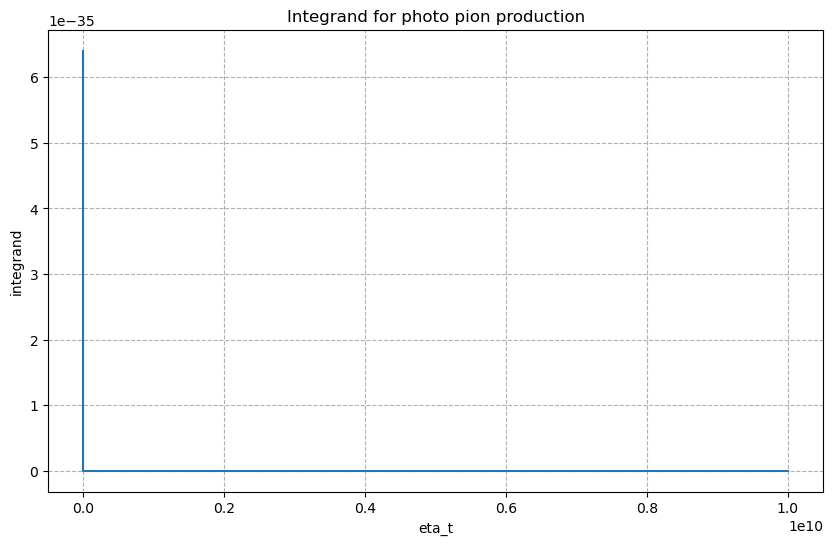

In [14]:
from scipy.integrate import dblquad

def f(y, x):
    # Define your function here
    return y * x

# Define the limits of integration
x_lower = 0
x_upper = 10**6
y_lower = 0
y_upper = 10**-6

# Perform the double integration
result, error = dblquad(f, x_lower, x_upper, lambda x: x*y_lower, lambda x: y_upper)

# Print the result
print(result)



print(500*10**6*ev_to_erg)
print(900*m_e*c**2)


eta_t_range = np.logspace(0, 10, 100)
eta_gamma_num = 1 
plot_val = []
for i in eta_t_range:
    plot_val.append(integrand(i, eta_gamma_num, R, 10**43, 10**21))

plt.figure(figsize=(10, 6))
plt.plot(eta_t_range, plot_val, label = "eta_gamma = 1")
plt.xlabel('eta_t')
plt.ylabel('integrand')
plt.title('Integrand for photo pion production')
#plt.xscale('log')
#plt.yscale('log')
plt.grid(True, which="both", ls="--")

plt.show()

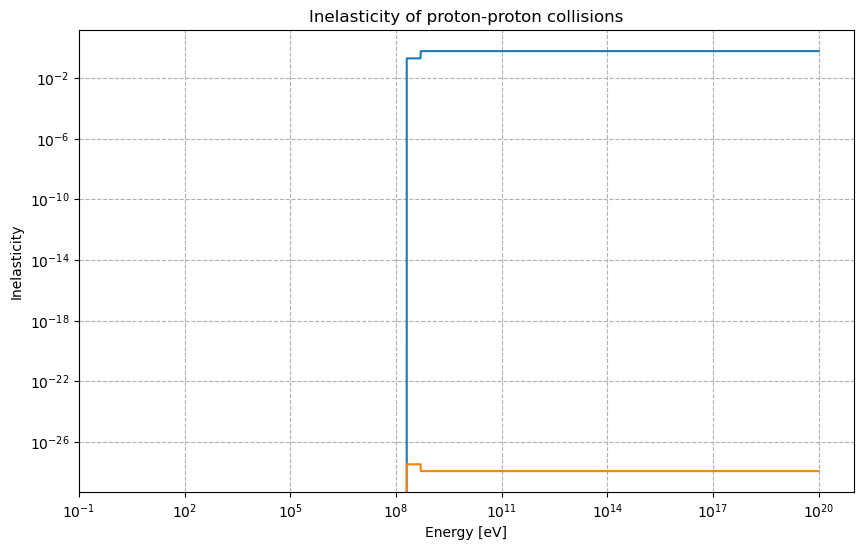

In [15]:

E_test = np.logspace(0,20,2000)
kappa = np.zeros(len(E_test))
sigma = np.zeros(len(E_test))
for i in range(len(E_test)):
    kappa[i] = inelastisity(E_test[i]*ev_to_erg)
    sigma[i] = cross_section_py(E_test[i]*ev_to_erg)
plt.figure(figsize=(10, 6))
plt.plot(E_test, kappa)
plt.plot(E_test, sigma)
plt.xlabel('Energy [eV]')
plt.ylabel('Inelasticity')
plt.xscale('log')
plt.yscale('log')
plt.title('Inelasticity of proton-proton collisions')
plt.grid(True, which="both", ls="--")




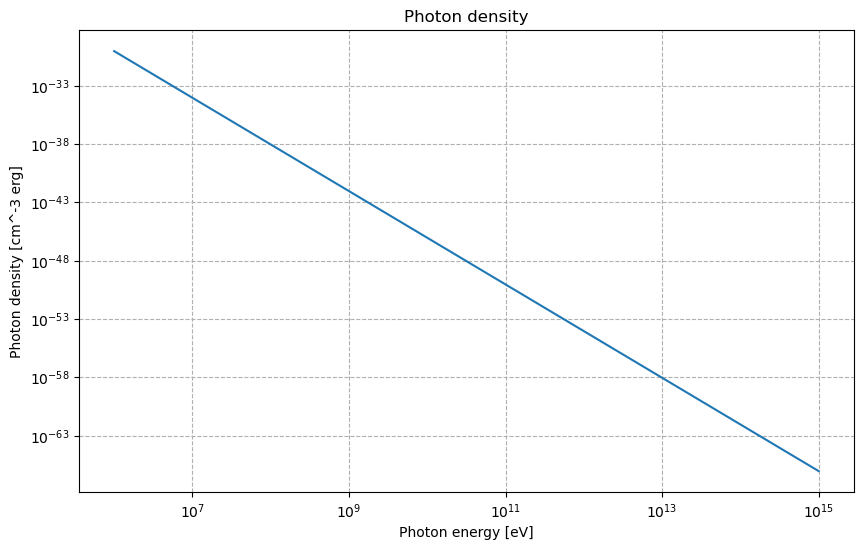

(0.33333333333333337, 5.551115123125783e-15)
500818359.73756
[1.00000000e+12 1.23284674e+12 1.51991108e+12 1.87381742e+12
 2.31012970e+12 2.84803587e+12 3.51119173e+12 4.32876128e+12
 5.33669923e+12 6.57933225e+12 8.11130831e+12 1.00000000e+13
 1.23284674e+13 1.51991108e+13 1.87381742e+13 2.31012970e+13
 2.84803587e+13 3.51119173e+13 4.32876128e+13 5.33669923e+13
 6.57933225e+13 8.11130831e+13 1.00000000e+14 1.23284674e+14
 1.51991108e+14 1.87381742e+14 2.31012970e+14 2.84803587e+14
 3.51119173e+14 4.32876128e+14 5.33669923e+14 6.57933225e+14
 8.11130831e+14 1.00000000e+15 1.23284674e+15 1.51991108e+15
 1.87381742e+15 2.31012970e+15 2.84803587e+15 3.51119173e+15
 4.32876128e+15 5.33669923e+15 6.57933225e+15 8.11130831e+15
 1.00000000e+16 1.23284674e+16 1.51991108e+16 1.87381742e+16
 2.31012970e+16 2.84803587e+16 3.51119173e+16 4.32876128e+16
 5.33669923e+16 6.57933225e+16 8.11130831e+16 1.00000000e+17
 1.23284674e+17 1.51991108e+17 1.87381742e+17 2.31012970e+17
 2.84803587e+17 3.511191

In [16]:
photon_energy = np.logspace(6, 15, 1000).astype(float)

plt.figure(figsize=(10, 6))
plt.plot(photon_energy,photon_energy**-2* n_eps_t_2(photon_energy, R, 10**43))
plt.xlabel('Photon energy [eV]')

plt.ylabel('Photon density [cm^-3 erg]')
plt.title('Photon density')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.show()


f = lambda y, x, a: a*x*y
print(dblquad(f, 0, 1, lambda x: x, lambda x: 2-x, args=(1,)))

print(980*m_e*c**2/ev_to_erg)
print(Energy_proton)

In [17]:

#get E max 
def find_index(arr1, arr2):
    
    diff = np.abs(arr1 - arr2)
   
    
    index = np.argmin(diff)
    
    return index
#t_col = 1/dynamical_time*np.ones(len(Energy_proton))+1/synchrotron_time + photo_pion_time
#index = find_index(1/acceleration_time, t_col)


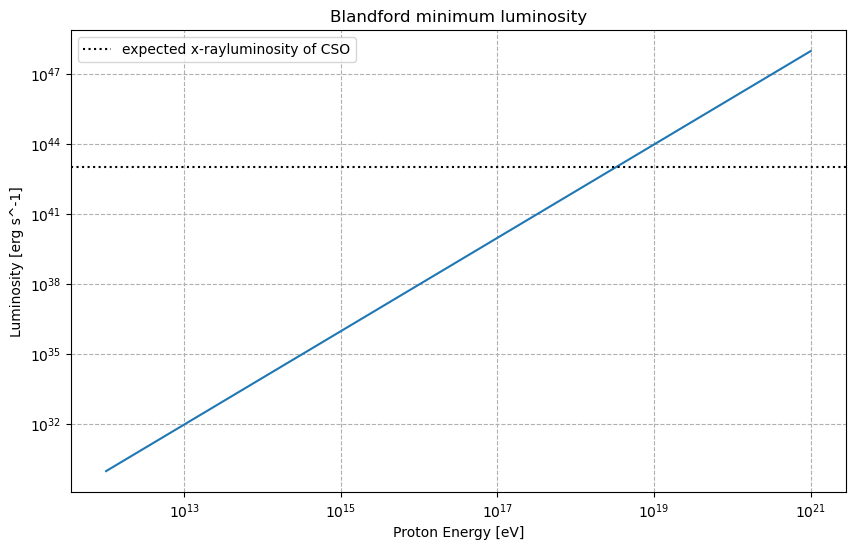

In [18]:
## Blandfor mimimun luminosity

def blandford_min_luminosity(gamma_fac, beta, E):
    return gamma_fac**2/beta*(E/10**20)**2*10**45.5

gamma_fac = 1.1
beta = 0.4

 
#Average lum is 10*43
plt.figure(figsize=(10, 6))
plt.plot(Energy_proton, blandford_min_luminosity(gamma_fac, beta, Energy_proton))
plt.axhline(y=10**43, color='black', linestyle='dotted', label='expected x-rayluminosity of CSO')
plt.xlabel('Proton Energy [eV]')
plt.ylabel('Luminosity [erg s^-1]')
plt.title('Blandford minimum luminosity')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.savefig('C:/Users/henri/OneDrive/Documents/NTNU/Semester 10/Masteroppgave/Plots/Blandford_min_luminosity.png')
plt.show()


In [19]:
x_1 = 1e-2
x_2 = 3e5

def f(y,x):
    return y**1*x**-2

result = dblquad(f, x_1, x_2,lambda x: x/2, lambda x: x_2, epsabs=1.49e-12, epsrel=1.49e-12,)

print(result)

def g_1(y,x):
    return np.exp(y)*np.exp(x)*f(np.exp(y),np.exp(x))

result_2 = dblquad(g_1, np.log(x_1), np.log(x_2), lambda x: x-np.log(2), lambda x: np.log(x_2), epsabs=1.49e-12, epsrel=1.49e-12,)

print(result_2)

(-187499.99980061577, 3.2051345428766296)
(4499999812500.003, 0.05023382476065308)


c:\Users\henri\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [20]:

from scipy.optimize import minimize
# Constants
Ld = 1e43  # Disk luminosity in erg/s
Gamma = 1.1 # Bulk Lorentz factor
Rdiss = np.logspace(13, 21, 500)  # Dissipation distance range in cm
RX = 30  # Extension of the X-ray corona in Schwarzschild radii
fX = 0.3  # Fraction of Ld emitted by the X-ray corona
fBLR = 0.1  # Fraction of Ld reprocessed by the BLR
fIR = 0.5  # Fraction of Ld reprocessed by the IR torus
RBLR = 1e17 * np.sqrt(Ld / 1e45)  # BLR radius in cm
RIR = 2.5e18 * np.sqrt(Ld / 1e45)  # IR torus radius in cm
beta = 0.4  # Velocity of the jet in units of the speed of light

M = 1e8*const.M_sun.cgs.value  # Black hole mass in g
m_dot = 0.1  # Accretion rate in Eddington units
c = const.c.cgs.value  # Speed of light in cm/s

G = const.G.cgs.value  # Gravitational constant in cm^3/g/s^2
RS = 2*G*M /c**2 # Schwarzschild radius in cm for a 10^9 solar mass black hole
R_i = 6*RS  # Inner radius of the accretion disk in cm
print(format_number(R)) #9.46e+18

eta = 0.1  # Radiative efficiency




gamma_p_nu = Energy_proton[-1]/(m_p*c**2)
nu_l = 145*10**6/(2*gamma_p_nu)*ev_to_erg/const.h.cgs.value
nu_up = 5e11 *ev_to_erg/const.h.cgs.value


nu_vals = np.logspace(np.log10(nu_l), np.log10(nu_up), 5000)
print(nu_vals)

def trapz_integral(x, y):
    dx = np.diff(x)
  
    new_y = np.array(y[:-1])+np.array(y[1:])
    
    result = np.sum(dx * (new_y)/2)
    return result

9.46e+18
[2.63510184e-02 2.66889095e-02 2.70311333e-02 ... 1.17848310e+26
 1.19359444e+26 1.20889954e+26]


3.62669860535602e+19
7.608319074291293e-09
8.031719543214084e-08 7.608319074291293e-08


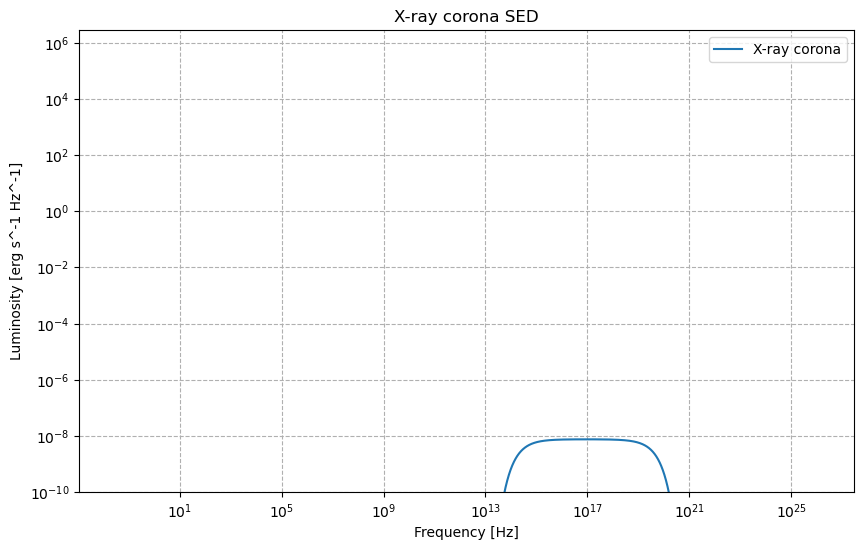

In [21]:
def UX(Rdiss, RX, RS, fX, Ld, Gamma):

    muX = (1 + RX**2 * RS**2 / Rdiss**2)**-0.5
    return fX * Ld * Gamma**2 / (np.pi * (RX * RS)**2 * c) * (1 - muX - beta*(1 - muX**2) + beta**2*(1 - muX**3) / 3)


#UX = fX * Ld * Gamma**2 / (np.pi * (RX * RS)**2 * 3e10) * (1 - muX - (1 - muX**2) + (1 - muX**3) / 3)
UX_val = []
for i in Rdiss:
    UX_val.append(UX(i, RX, RS, fX, Ld, Gamma))

nu_c = 150*10**3 *ev_to_erg/const.h.cgs.value

print(nu_c)
E1 = 10**0*ev_to_erg/const.h.cgs.value
E2 = 10**6*ev_to_erg/const.h.cgs.value
alpha_x = 1
index_x = find_index(Rdiss, R)
#index_x = 3
D_init =  UX_val[index_x]/10
def UX_spec(nu,D, nu_c, alpha_x):
    if nu > 0.01*ev_to_erg/const.h.cgs.value:
        return D*(nu )**(-alpha_x)*np.exp(-nu/nu_c)*np.exp(-E1/nu)
    else:
        return 0





def integrate_SED(D,func, E1 = E1, E2 = E2, nu_c = nu_c, alpha_x = alpha_x):
    integral, _ = quad(func, E1, E2, args=(D, nu_c, alpha_x))
    #print(integral)
    return integral

def objective_function(D, target_luminosity,func, E1 = E1, E2 = E2, nu_c = nu_c, alpha_x = alpha_x):
   
    return abs(integrate_SED(D,func,E1,E2,nu_c,alpha_x) - target_luminosity)


result = minimize(objective_function, D_init, args=(UX_val[index_x],UX_spec), method='Nelder-Mead', tol=1e-6)

D_x = result.x[0]
print(D_x)
print(integrate_SED(D_x,UX_spec, E1, E2, nu_c, alpha_x), UX_val[index_x])


UX_spec_vals = []
for i in nu_vals:
    UX_spec_vals.append(UX_spec(i,D_x, nu_c, alpha_x))

UX_spec_vals = np.array(UX_spec_vals)
plt.figure(figsize=(10, 6))
plt.plot(nu_vals, nu_vals*UX_spec_vals, label='X-ray corona')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Luminosity [erg s^-1 Hz^-1]')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-10)
plt.title('X-ray corona SED')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()




373 9.46e+18 1.48e+16 1.77e+14
323340.1950886441
0.999998804389165
0.9999999998278317
177195010030325.25
1.4766250379947958e+16
29532500761002.496


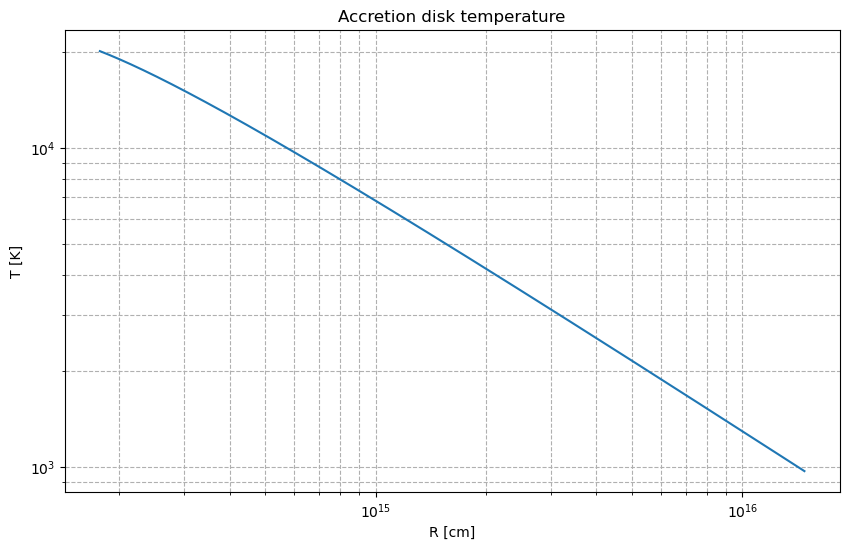

  0%|          | 0/5000 [00:00<?, ?it/s]C:\Users\henri\AppData\Local\Temp\ipykernel_5212\1609177578.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  return 2*const.h.cgs.value*nu**3/const.c.cgs.value**2/(np.exp(const.h.cgs.value*nu/(const.k_B.cgs.value*T_val))-1)/rel_fac**2
 64%|██████▍   | 3203/5000 [01:17<00:48, 37.35it/s]C:\Users\henri\AppData\Local\Temp\ipykernel_5212\1609177578.py:23: RuntimeWarning: overflow encountered in exp
  return 2*const.h.cgs.value*nu**3/const.c.cgs.value**2/(np.exp(const.h.cgs.value*nu/(const.k_B.cgs.value*T_val))-1)/rel_fac**2
100%|██████████| 5000/5000 [02:04<00:00, 40.20it/s]


0.02038220707239201


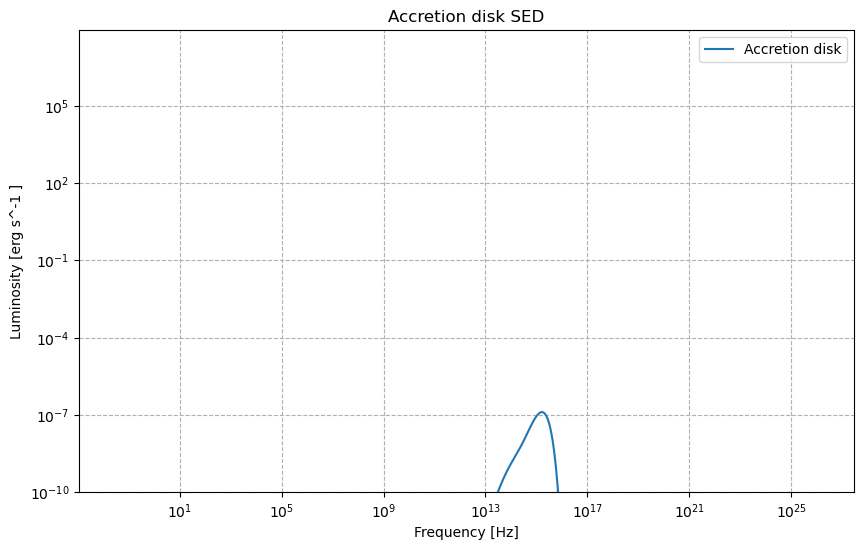

1.7879206673214307e-07 1.7879206673214304e-07


In [22]:
def Uacc(Rdiss, Ld, Gamma):
    #U = 1/(Gamma**2*(1+beta**2)**2)*3*G*M*m_dot/(8*np.pi*Rdiss**2*c*R_i)
    U = 1/(Gamma**2*(1+beta**2)**2)*Ld/(4*np.pi*Rdiss**2*c)

    return U

Uacc_val = []
for i in Rdiss:
    Uacc_val.append(Uacc(i, Ld, Gamma))
R_out =500 *RS
print(index_x,format_number(R),format_number(R_out),format_number(R_i))
R_diss_val = Rdiss[index_x]
print(R_diss_val/RS)
acc_1 = (1+ R_out**2/R_diss_val**2)**-0.5
print(acc_1)
acc_2 = (1+ R_i**2/R_diss_val**2)**-0.5
print(acc_2)
def I_v(u, nu,Rdiss_val):
    R_acc = Rdiss_val*(1/u**2-1)**0.5
    #print(u,R/RS,500,T_acc(R))
    rel_fac =Gamma*(1-beta*u) 
    T_val =T_acc(R_acc)
    return 2*const.h.cgs.value*nu**3/const.c.cgs.value**2/(np.exp(const.h.cgs.value*nu/(const.k_B.cgs.value*T_val))-1)/rel_fac**2

def T_acc(R):
    return (3*RS*Ld/(16*np.pi*R**3*eta*const.sigma_sb.cgs.value)*(1-(3*RS/R)**0.5))**0.25


print(R_diss_val*(1/acc_2**2-1)**0.5)
print(R_diss_val*(1/acc_1**2-1)**0.5)
print(RS)
R_list = np.logspace(np.log10(R_diss_val*(1/acc_2**2-1)**0.5), np.log10(R_diss_val*(1/acc_1**2-1)**0.5), 1000)

T_acc_val = []
for i in R_list:
    T_acc_val.append(T_acc(i))

plt.figure(figsize=(10, 6))
plt.plot(R_list, T_acc_val)
plt.xlabel('R [cm]')
plt.ylabel('T [K]')
plt.xscale('log')
plt.yscale('log')
plt.title('Accretion disk temperature')
plt.grid(True, which="both", ls="--")
plt.show()

                  



def Uacc_spec(nu,acc_1,acc_2,R_diss_val):
    u_val = np.logspace(np.log10(acc_1), np.log10(acc_2), 100)
    vals = []
    for i in u_val:
        I = I_v(i,nu,R_diss_val)
        if I < 0 or np.isnan(I) or np.isinf(I):
            I = 0
        vals.append(I)
    vals = np.array(vals)
    val = trapz_integral(u_val,vals)
    U_acc_spec = 2*np.pi/c*val#quad(I_v, acc_1, acc_2, args=(nu,R_diss_val))[0]
    return U_acc_spec

U_acc_spec_val = []
nu_vals_acc = nu_vals
for i in tqdm(nu_vals_acc):
    
    U_acc_spec_val.append(Uacc_spec(i,acc_1,acc_2,R_diss_val))
U_acc_spec_val = np.array(U_acc_spec_val)
D_acc = 1/(np.trapz(U_acc_spec_val, nu_vals)/ Uacc_val[index_x])
print(D_acc)
U_acc_spec_val = D_acc*U_acc_spec_val

plt.figure(figsize=(10, 6))
plt.plot(nu_vals_acc, nu_vals_acc*U_acc_spec_val, label='Accretion disk')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Luminosity [erg s^-1 ]')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-10)
plt.title('Accretion disk SED')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

print(np.trapz(U_acc_spec_val, nu_vals_acc), Uacc_val[index_x])



C:\Users\henri\AppData\Local\Temp\ipykernel_5212\3993984147.py:24: RuntimeWarning: overflow encountered in exp
  if (np.exp(const.h.cgs.value*nu/(const.k_B.cgs.value*T))) == np.inf:


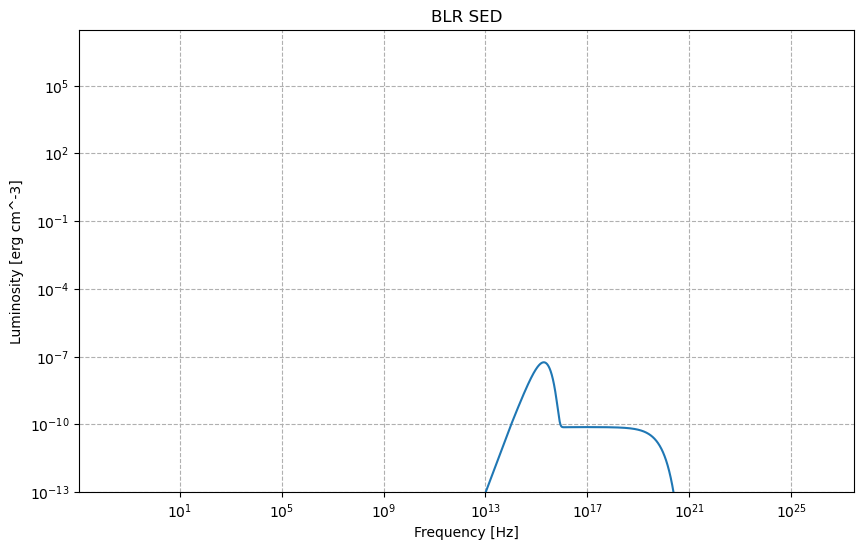

7.608317869332254e-08 7.608317869332253e-08


In [23]:
def UBLR(Rdiss, RBLR, fBLR, Ld, Gamma):
      
    if Rdiss <= RBLR:
        return fBLR * Ld * Gamma**2 / (np.pi * RBLR**2 * c)
    elif Rdiss >= 3*RBLR:
        muIR1 = (1 + RBLR**2 / Rdiss**2)**-0.5
        muIR2 = (1 - RBLR**2 / Rdiss**2)**-0.5
        return fBLR * Ld * Gamma**2 / (np.pi * RBLR**2 * c*beta *3)*(2*(1-beta*muIR1)**3-(1-beta*muIR2)**3-(1-beta)**3)
    else:
        b = np.log(UBLR(3*RBLR,RBLR,fBLR,Ld,Gamma)/UBLR(RBLR,RBLR,fBLR,Ld,Gamma))/np.log(3)
        a = UBLR(RBLR,RBLR,fBLR,Ld,Gamma)/RBLR**b
        return a*Rdiss**b
    
    
    #(UIR(RBLR, RBLR, fBLR, Ld, Gamma)-UIR(3*RBLR, RBLR, fBLR, Ld, Gamma))*((3*RBLR-Rdiss)/(2*RBLR))**2+UIR(3*RBLR, RBLR, fBLR, Ld, Gamma)
    

UBLR_val = []
for i in Rdiss:
    UBLR_val.append(UBLR(i, RBLR, fBLR, Ld, Gamma))


def blackbody_spectrum(nu, T):
    if (np.exp(const.h.cgs.value*nu/(const.k_B.cgs.value*T))) == np.inf:
        
        return 0
    elif (np.exp(const.h.cgs.value*nu/(const.k_B.cgs.value*T))-1)==0:
        return (2 * const.h.cgs.value * nu**3 / c**2) /(np.exp(const.h.cgs.value*nu/(const.k_B.cgs.value*T)) - 1+0.001)
    
    return (2 * const.h.cgs.value * nu**3 / c**2) /(np.exp(const.h.cgs.value*nu/(const.k_B.cgs.value*T)) - 1)

wavelength_nm = 121.6 #lyman alpha line 
wavelength_m = wavelength_nm * 1e-9
Temp_LY = 2.898*10**-3/wavelength_m





#print(Temp_LY)
Halpha_line = Temp_LY#2.47*10**15 #Hz #
f_blr_x = 0.01

def UBLR_spec(nu,D,Halpha_line):
    T = Halpha_line 
    
    return D*2*np.pi/c*blackbody_spectrum(nu,T)


def integrate_SED_blr(D,func, nu_vals , Halpha_line ):
    vals = []
    for i in nu_vals:
        res = func(i,D,Halpha_line)
        vals.append(res)
    vals = np.array(vals)
    
    integral = trapz_integral(nu_vals,vals) 
    
  
    #print(integral)
    return integral



index_blr = find_index(Rdiss, R)



D_blr = UBLR_val[index_blr]/integrate_SED_blr(1,UBLR_spec,nu_vals,Halpha_line)
#D_blr = result.x[0]

UBLR_spec_vals = []
for i in nu_vals:
    val = UBLR_spec(i,D_blr,Halpha_line)
    if val == np.inf:
        UBLR_spec_vals.append(0)
    else:

        UBLR_spec_vals.append(val)

plt.figure(figsize=(10, 6))
plt.plot(nu_vals, nu_vals*UBLR_spec_vals+f_blr_x*nu_vals*UX_spec_vals)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Luminosity [erg cm^-3]')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-13)
plt.title('BLR SED')
plt.grid(True, which="both", ls="--")
plt.show()
print(UBLR_val[index_blr],integrate_SED_blr(D_blr,UBLR_spec,nu_vals,Halpha_line))


C:\Users\henri\AppData\Local\Temp\ipykernel_5212\3993984147.py:24: RuntimeWarning: overflow encountered in exp
  if (np.exp(const.h.cgs.value*nu/(const.k_B.cgs.value*T))) == np.inf:


0.005365098877758171


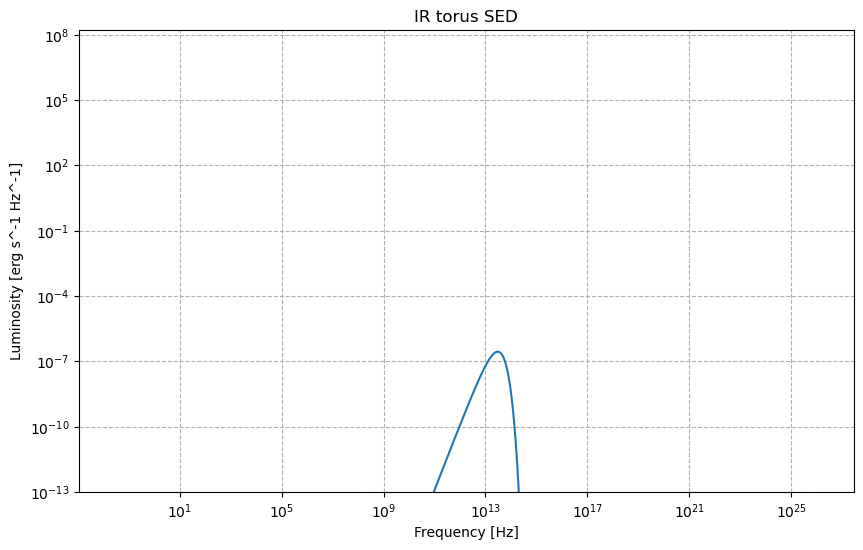

In [24]:

def UIR(Rdiss, RIR, fIR, Ld, Gamma):
  
    if Rdiss <= RIR:
        return fIR * Ld * Gamma**2 / (np.pi * RIR**2 * c)
    elif Rdiss >= 3*RIR:
        muIR1 = (1 + RIR**2 / Rdiss**2)**-0.5
        muIR2 = (1 - RIR**2 / Rdiss**2)**-0.5
        return fIR * Ld * Gamma**2 / (np.pi * RIR**2 * c*beta *3)*(2*(1-beta*muIR1)**3-(1-beta*muIR2)**3-(1-beta)**3)
    else:
        b = np.log(UBLR(3*RIR,RIR,fIR,Ld,Gamma)/UBLR(RIR,RIR,fIR,Ld,Gamma))/np.log(3)
        a = UBLR(RIR,RIR,fIR,Ld,Gamma)/RIR**b
        return a*Rdiss**b#(UIR(RIR, RIR, fIR, Ld, Gamma)-UIR(3*RIR, RIR, fIR, Ld, Gamma))*((3*RIR-Rdiss)/(2*RIR))**2+UIR(3*RIR, RIR, fIR, Ld, Gamma)



UIR_val = []
for i in Rdiss:
    UIR_val.append(UIR(i, RIR, fIR, Ld, Gamma))

UIR_val = np.array(UIR_val)

nu_IR = 3 *10**13#Hz

T_IR  = 370 #*b #Kelvin
def UIR_spec(nu,D_ir,T):
    return D_ir*2*np.pi/c*blackbody_spectrum(nu,T)

index_ir = find_index(Rdiss, R)

ir_init =UIR_val[index_ir]*10
ir_lowerlim = nu_vals[0]
ir_upperlim = nu_vals[-1]


def integrate_SED_tir(D,func, nu_vals , Halpha_line ):
    vals = []
    for i in nu_vals:
        res = func(i,D,Halpha_line)
        vals.append(res)
    vals = np.array(vals)
    
    integral = trapz_integral(nu_vals,vals) 
    
  
    #print(integral)
    return integral


index_blr = find_index(Rdiss, R)



#D_blr = UBLR_val[index_blr]/integrate_SED_blr(1,UBLR_spec,nu_vals,Halpha_line)
#D_blr = result.x[0]


D_ir = UIR_val[index_ir]/integrate_SED_tir(1,UIR_spec,nu_vals,T_IR)
print(D_ir)
UIR_spec_vals = []
for i in nu_vals:
    UIR_spec_vals.append(UIR_spec(i,D_ir,T_IR))

plt.figure(figsize=(10, 6))
plt.plot(nu_vals, nu_vals*UIR_spec_vals)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Luminosity [erg s^-1 Hz^-1]')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-13)
plt.title('IR torus SED')
plt.grid(True, which="both", ls="--")
plt.show()



29958.505957893914 0.01
1.0288055449048929e+40
[2.63510184e-02 2.66889095e-02 2.70311333e-02 ... 1.17848310e+26
 1.19359444e+26 1.20889954e+26]
[1.2325615079224001e-42, 1.2724542130532236e-42, 1.3136380731588096e-42, 1.3561548773623421e-42, 1.4000477673208606e-42, 1.4453612810009546e-42, 1.4921413978712846e-42, 1.540435585557796e-42, 1.590292848008956e-42, 1.6417637752198945e-42, 1.6949005945659016e-42, 1.7497572237973665e-42, 1.8063893257499383e-42, 1.8648543648254126e-42, 1.925211665300671e-42, 1.987522471523816e-42, 2.0518500100586136e-42, 2.1182595538402603e-42, 2.1868184884076198e-42, 2.2575963802790985e-42, 2.3306650475415506e-42, 2.4060986327238537e-42, 2.4839736780290764e-42, 2.564369203001594e-42, 2.6473667847079573e-42, 2.733050640512856e-42, 2.821507713534198e-42, 2.9128277608639984e-42, 3.007103444644592e-42, 3.104430426092598e-42, 3.20490746256603e-42, 3.3086365077730565e-42, 3.415722815224074e-42, 3.5262750450320954e-42, 3.6404053741697983e-42, 3.7582296102951106e-42, 3.8

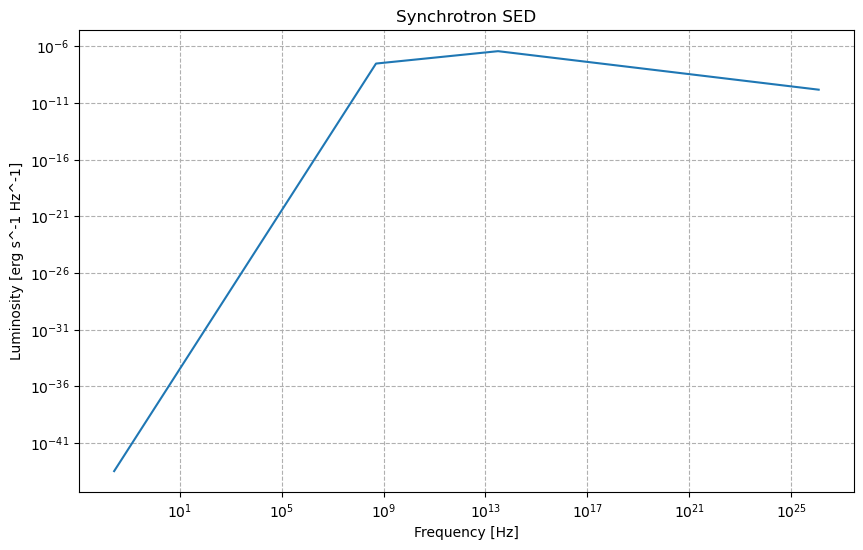

In [148]:
##Syn spectrum

L_syn = 10**44
t_s = R/c
t_s = t_s/(365*60*60*24)
nu_sa = 0.5*10**9
nu_br = 3*10**5*(B/10**-3)**-3*(t_s/10**2)**-2*10**9
alpha_syn = 0.77
print(nu_br/1e9,B)
D_syn = L_syn/(((2/7)-1/(1-alpha_syn))*nu_sa**(1-alpha_syn)+(1/(1-alpha_syn)+1/(alpha_syn-1/2))*nu_br**(1-alpha_syn))
print(D_syn)
def L_syn_v(nu, D, alpha,nu_sa ,nu_br):
    if (nu < nu_sa):
        return D*nu_sa**(-alpha-5/2)*nu**(5/2)
    elif (nu_sa <= nu < nu_br):
        return D*nu**(-alpha)
    else:
        return D*nu_br**(1/2)*nu**(-alpha-1/2)

print(nu_vals)
U_syn_vals = []
for i in nu_vals:
    U_syn_vals.append(L_syn_v(i,D_syn,alpha_syn,nu_sa,nu_br)/(4*np.pi*R**2 *c))
print(U_syn_vals)
plt.figure(figsize=(10, 6))
plt.plot(nu_vals, nu_vals*U_syn_vals)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Luminosity [erg s^-1 Hz^-1]')
plt.xscale('log')
plt.yscale('log')
#plt.ylim(10**-13)
plt.title('Synchrotron SED')
plt.grid(True, which="both", ls="--")
plt.show()


[ 4.74617447e+01 -1.17557819e+03  1.03348686e+04  1.30457118e+01
 -6.58019353e-01]


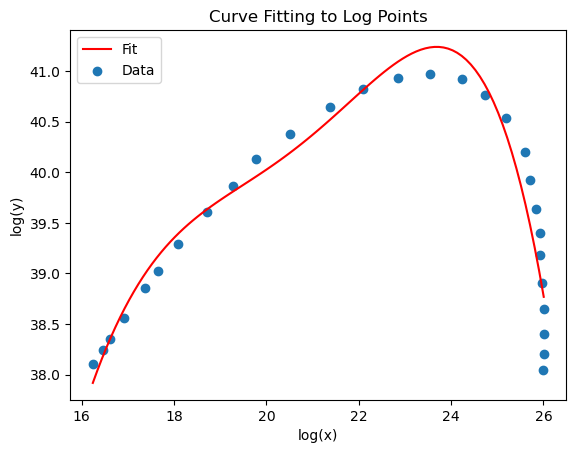

C:\Users\henri\AppData\Local\Temp\ipykernel_5212\4206171697.py:5: RuntimeWarning: overflow encountered in exp
  return (a*nu**2 +b*nu + c + e*nu**3)*np.exp(-d/nu)**4
C:\Users\henri\AppData\Local\Temp\ipykernel_5212\4206171697.py:5: RuntimeWarning: overflow encountered in power
  return (a*nu**2 +b*nu + c + e*nu**3)*np.exp(-d/nu)**4
C:\Users\henri\AppData\Local\Temp\ipykernel_5212\4206171697.py:5: RuntimeWarning: overflow encountered in multiply
  return (a*nu**2 +b*nu + c + e*nu**3)*np.exp(-d/nu)**4
C:\Users\henri\AppData\Local\Temp\ipykernel_5212\4206171697.py:33: RuntimeWarning: overflow encountered in power
  U_IC = 10**func_to_fit(np.log10(nu_vals), *popt)/(4*np.pi*R**2*c)


[ 5.47525882e+02 -6.57554655e+03  2.75692938e+04  7.95658582e+00
 -1.55945389e+01]


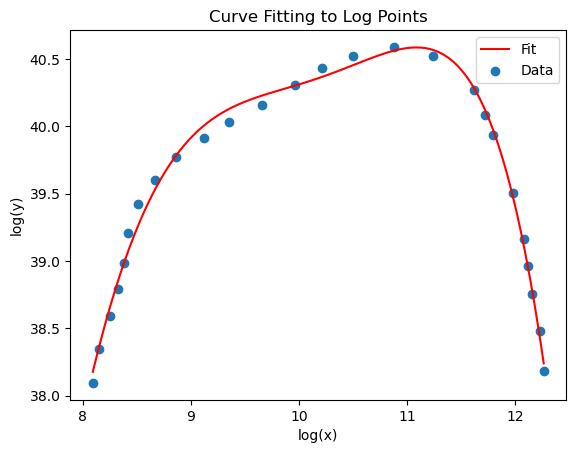

C:\Users\henri\AppData\Local\Temp\ipykernel_5212\4206171697.py:36: RuntimeWarning: overflow encountered in exp
  return (a*nu**2 +b*nu + c + e*nu**3)*np.exp(-d/nu)**4
C:\Users\henri\AppData\Local\Temp\ipykernel_5212\4206171697.py:36: RuntimeWarning: overflow encountered in power
  return (a*nu**2 +b*nu + c + e*nu**3)*np.exp(-d/nu)**4
C:\Users\henri\AppData\Local\Temp\ipykernel_5212\4206171697.py:64: RuntimeWarning: overflow encountered in power
  U_SYN = 10**func_to_fit(np.log10(nu_vals), *popt)/(4*np.pi*R**2*c)


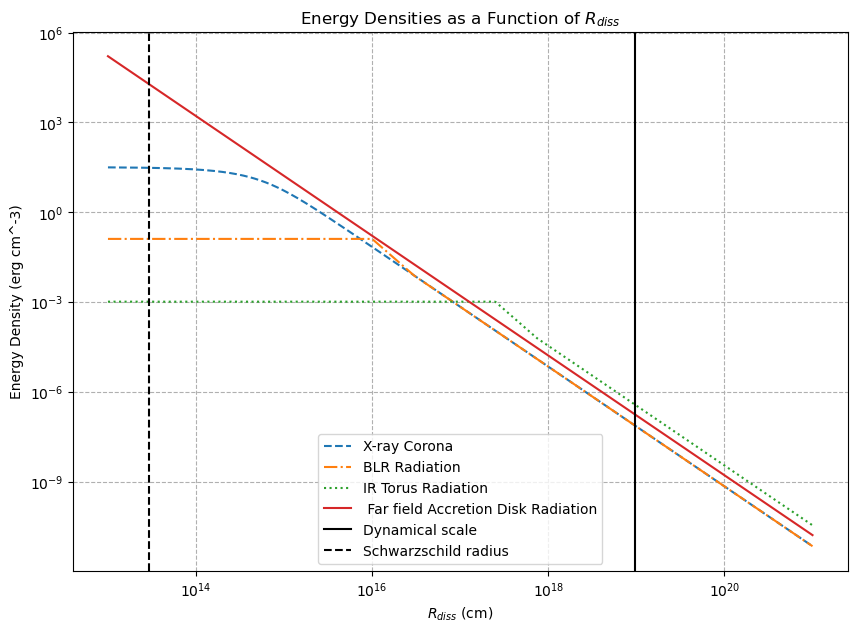

1.7879206673214307e-07 1.7879206673214304e-07
3.8037976546341645e-07 3.803797654634165e-07
8.189849966930318e-08 7.608319074291293e-08
7.608317869332253e-08 7.608317869332254e-08


C:\Users\henri\AppData\Local\Temp\ipykernel_5212\3993984147.py:24: RuntimeWarning: overflow encountered in exp
  if (np.exp(const.h.cgs.value*nu/(const.k_B.cgs.value*T))) == np.inf:


[1.218454970489471e-49, 1.24978465417146e-49, 1.2821284599032706e-49, 1.3155179362837797e-49, 1.349371843105923e-49, 1.3843213970189041e-49, 1.4197710917303295e-49, 1.4563692339320864e-49, 1.4941514524831288e-49, 1.5325005686732333e-49, 1.5720914755822014e-49, 1.6129627574153951e-49, 1.654474635179417e-49, 1.697329980555205e-49, 1.740873427657616e-49, 1.7858270006425583e-49, 1.832234500181117e-49, 1.8794167599802555e-49, 1.9281258290883253e-49, 1.9776660488569794e-49, 2.0288100939830557e-49, 2.0808456188316263e-49, 2.134566358581913e-49, 2.190024650580506e-49, 2.2464825629998346e-49, 2.3039651187162065e-49, 2.3641223582734966e-49, 2.4245756309194848e-49, 2.4869879862332907e-49, 2.551420141643161e-49, 2.617080282458689e-49, 2.684865439109755e-49, 2.7539649775733015e-49, 2.825300810916155e-49, 2.8980430973786346e-49, 2.9731393905339407e-49, 3.0497402210252007e-49, 3.1288195967585494e-49, 3.2095079690605422e-49, 3.2918480672970394e-49, 3.37685467464435e-49, 3.4646106190822045e-49, 3.55320

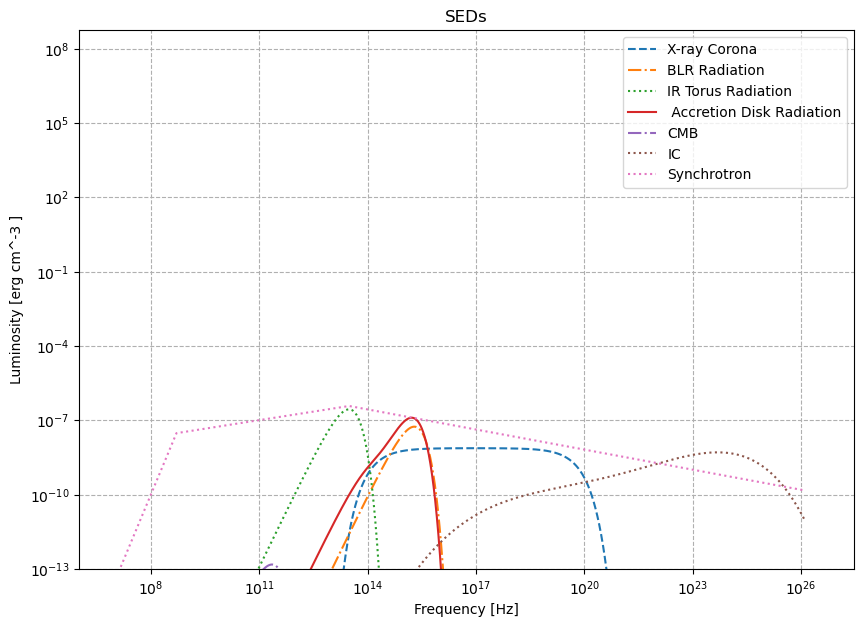

C:\Users\henri\AppData\Local\Temp\ipykernel_5212\4206171697.py:129: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nu_vals, np.log10(4*np.pi*R**2*nu_vals*UX_spec_vals*c),alpha = 0.5,label = 'X-ray corona')
C:\Users\henri\AppData\Local\Temp\ipykernel_5212\4206171697.py:130: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nu_vals, np.log10(4*np.pi*R**2*nu_vals*U_acc_spec_val*c),alpha = 0.5,label = 'Accretion disk')
C:\Users\henri\AppData\Local\Temp\ipykernel_5212\4206171697.py:131: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nu_vals, np.log10(4*np.pi*R**2*nu_vals*UBLR_spec_vals*c),alpha = 0.5,label = 'BLR')
C:\Users\henri\AppData\Local\Temp\ipykernel_5212\4206171697.py:132: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nu_vals, np.log10(4*np.pi*R**2*nu_vals*UIR_spec_vals*c),alpha = 0.5,label = 'IR torus')


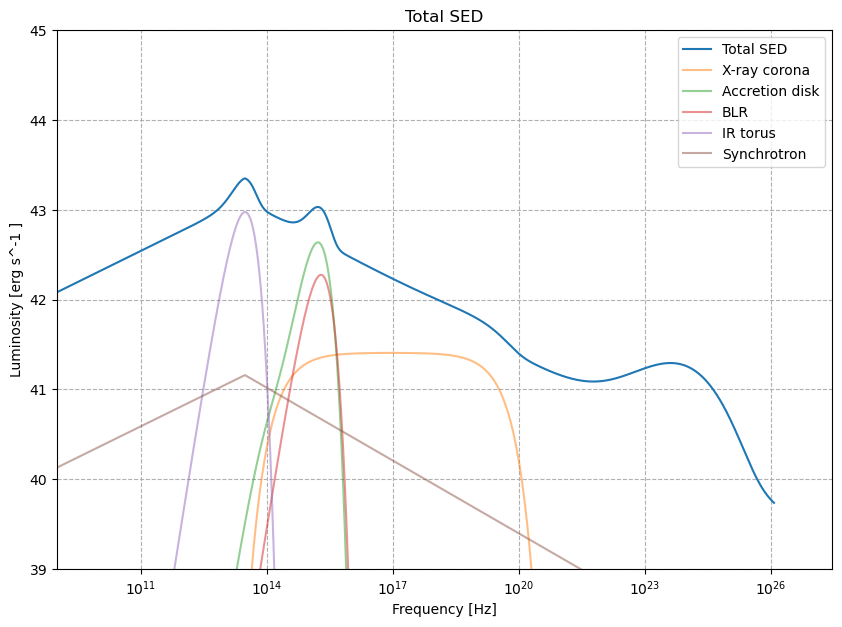

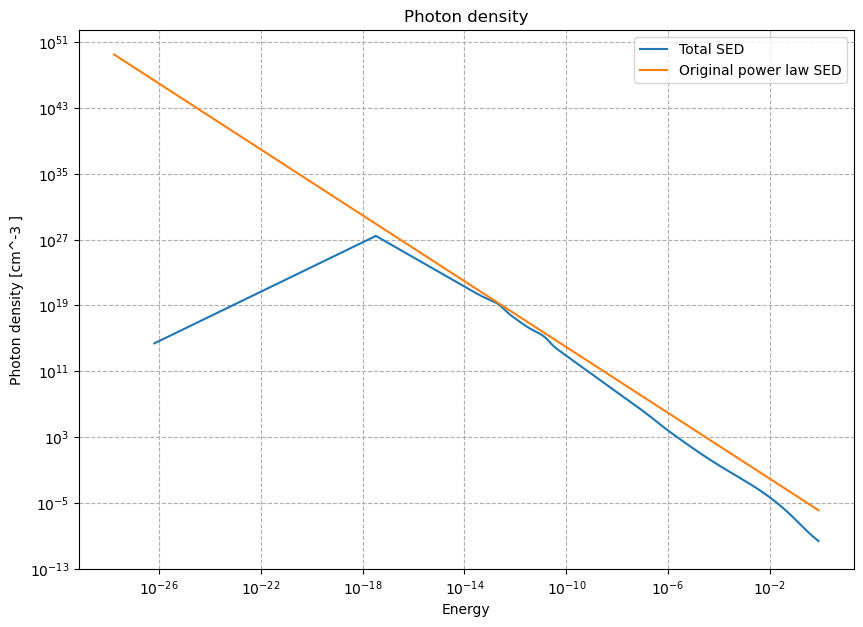

In [150]:

import pandas as pd 
from scipy.optimize import curve_fit

def func_to_fit(nu,a,b,c,d,e):
    return (a*nu**2 +b*nu + c + e*nu**3)*np.exp(-d/nu)**4

data = pd.read_csv('plot-data (2).csv')

xdata = data['x']
ydata = data[' y']

# Fit the function to the data
# popt contains the optimized parameters, pcov contains the covariance matrix
popt, pcov = curve_fit(func_to_fit, xdata, ydata, p0=[2,1,1,25,1])

# Plot the data points
print(popt)

# Plot the fitted curve
# Generate enough points to make the curve smooth
x_fit = np.linspace(min(xdata), max(xdata), 100)
y_fit = func_to_fit(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r-', label='Fit' )
plt.scatter(xdata, ydata, label='Data')
# Add labels and legend
plt.xlabel('log(x)')
plt.ylabel('log(y)')
plt.title('Curve Fitting to Log Points')
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.show()
U_IC = 10**func_to_fit(np.log10(nu_vals), *popt)/(4*np.pi*R**2*c)

def func_to_fit(nu,a,b,c,d,e):
    return (a*nu**2 +b*nu + c + e*nu**3)*np.exp(-d/nu)**4

data2 = pd.read_csv('plot-data (3).csv')

xdata = data2['x']
ydata = data2[' y']

# Fit the function to the data
# popt contains the optimized parameters, pcov contains the covariance matrix
popt, pcov = curve_fit(func_to_fit, xdata, ydata, p0=[2,1,1,11,1])

# Plot the data points
print(popt)

# Plot the fitted curve
# Generate enough points to make the curve smooth
x_fit = np.linspace(min(xdata), max(xdata), 100)
y_fit = func_to_fit(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r-', label='Fit' )
plt.scatter(xdata, ydata, label='Data')
# Add labels and legend
plt.xlabel('log(x)')
plt.ylabel('log(y)')
plt.title('Curve Fitting to Log Points')
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.show()
U_SYN = 10**func_to_fit(np.log10(nu_vals), *popt)/(4*np.pi*R**2*c)

#def U_host_g(R_star,L_star)
dyn_scal = find_index(Rdiss, R)
RS_diss = find_index(Rdiss, RS)
plt.figure(figsize=(10, 7))
plt.loglog(Rdiss, UX_val, label='X-ray Corona', linestyle='--')
plt.loglog(Rdiss, UBLR_val, label='BLR Radiation', linestyle='-.')
plt.loglog(Rdiss, UIR_val, label='IR Torus Radiation', linestyle=':')
plt.loglog(Rdiss, Uacc_val, label=' Far field Accretion Disk Radiation', linestyle='-')
plt.axvline(Rdiss[dyn_scal], color='black', linestyle='-', label='Dynamical scale')
plt.axvline(RS, color='black', linestyle='--', label='Schwarzschild radius')

plt.xlabel('$R_{diss}$ (cm)')
plt.ylabel('Energy Density (erg cm^-3)')
plt.title('Energy Densities as a Function of $R_{diss}$')
plt.legend()
plt.grid(True, which="both", ls="--")
#plt.savefig('C:/Users/henri/OneDrive/Documents/NTNU/Semester 10/Masteroppgave/Plots/Energy_densities.png')
plt.show()


    

print(np.trapz(U_acc_spec_val, nu_vals), Uacc_val[index_x])
print(np.trapz(UIR_spec_vals, nu_vals), UIR_val[index_ir])
print(np.trapz(UX_spec_vals, nu_vals), UX_val[index_x])
#print(UBLR_spec_vals)

#print(np.trapz(UBLR_spec_vals, nu_vals),UBLR_val[index_blr])
print(trapz_integral(nu_vals, UBLR_spec_vals),UBLR_val[index_blr] )

cmb_T = 2.72548
U_CMB = []
for i in nu_vals:
    U_CMB.append(blackbody_spectrum(i, cmb_T)*2*np.pi/c)


print(U_CMB)

plt.figure(figsize=(10, 7))
plt.plot(nu_vals, nu_vals*UX_spec_vals, label='X-ray Corona', linestyle='--')
plt.plot(nu_vals, nu_vals*UBLR_spec_vals, label='BLR Radiation', linestyle='-.')
plt.plot(nu_vals, nu_vals*UIR_spec_vals, label='IR Torus Radiation', linestyle=':')
plt.plot(nu_vals, nu_vals*U_acc_spec_val, label=' Accretion Disk Radiation', linestyle='-')
plt.plot(nu_vals, nu_vals*U_CMB, label='CMB', linestyle='-.')
plt.plot(nu_vals,U_IC, label='IC', linestyle=':')
plt.plot(nu_vals,nu_vals*U_syn_vals, label='Synchrotron', linestyle=':')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Luminosity [erg cm^-3 ]')
plt.xscale('log')
plt.yscale('log')
plt.title('SEDs')
plt.ylim(10**-13)
plt.xlim(10**6)
plt.legend()
plt.grid(True, which="both", ls="--")
#plt.savefig('C:/Users/henri/OneDrive/Documents/NTNU/Semester 10/Masteroppgave/Plots/SEDs_sep.png')
plt.show()




plt.figure(figsize=(10, 7))
plt.plot(nu_vals, np.log10(4*np.pi*R**2*(nu_vals*(UX_spec_vals+U_acc_spec_val+UBLR_spec_vals + f_blr_x*UX_spec_vals+UIR_spec_vals)+U_IC+ U_syn_vals*nu_vals)*c), label='Total SED')#U_CMB
plt.plot(nu_vals, np.log10(4*np.pi*R**2*nu_vals*UX_spec_vals*c),alpha = 0.5,label = 'X-ray corona')
plt.plot(nu_vals, np.log10(4*np.pi*R**2*nu_vals*U_acc_spec_val*c),alpha = 0.5,label = 'Accretion disk')
plt.plot(nu_vals, np.log10(4*np.pi*R**2*nu_vals*UBLR_spec_vals*c),alpha = 0.5,label = 'BLR')
plt.plot(nu_vals, np.log10(4*np.pi*R**2*nu_vals*UIR_spec_vals*c),alpha = 0.5,label = 'IR torus')
#plt.plot(nu_vals, np.log10(4*np.pi*R**2*nu_vals*U_IC*c),alpha = 0.5,label = 'IC')
plt.plot(nu_vals, np.log10(4*np.pi*(10**18)**2*nu_vals*U_syn_vals*c),alpha = 0.5,label = 'Synchrotron')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Luminosity [erg s^-1 ]')
plt.xscale('log')
#plt.yscale('log')
plt.title('Total SED')
plt.ylim(39,45)
plt.xlim(10**9)
plt.legend()
plt.grid(True, which="both", ls="--")
#plt.savefig('C:/Users/henri/OneDrive/Documents/NTNU/Semester 10/Masteroppgave/Plots/SED.png')
plt.show()




u_tot_for_r = (UX_spec_vals+U_acc_spec_val+UBLR_spec_vals + f_blr_x*UX_spec_vals+UIR_spec_vals+ U_CMB)*nu_vals + U_IC + U_syn_vals*nu_vals
#n_tot_for_r = u_tot_for_r/(const.c.cgs.value)
plt.figure(figsize=(10, 7))
plt.plot(nu_vals*const.h.cgs.value, u_tot_for_r/(nu_vals*const.h.cgs.value)**2, label='Total SED')
plt.plot(nu_vals*const.h.cgs.value,  n_eps_t_2(nu_vals*const.h.cgs.value, R, 10**43), label='Original power law SED')
plt.xlabel('Energy')
plt.ylabel('Photon density [cm^-3 ]')
plt.xscale('log')
plt.yscale('log')
plt.title('Photon density')
plt.ylim(10**-13)
plt.legend()
plt.grid(True, which="both", ls="--")
#plt.savefig('C:/Users/henri/OneDrive/Documents/NTNU/Semester 10/Masteroppgave/Plots/Photon_density.png')
plt.show()


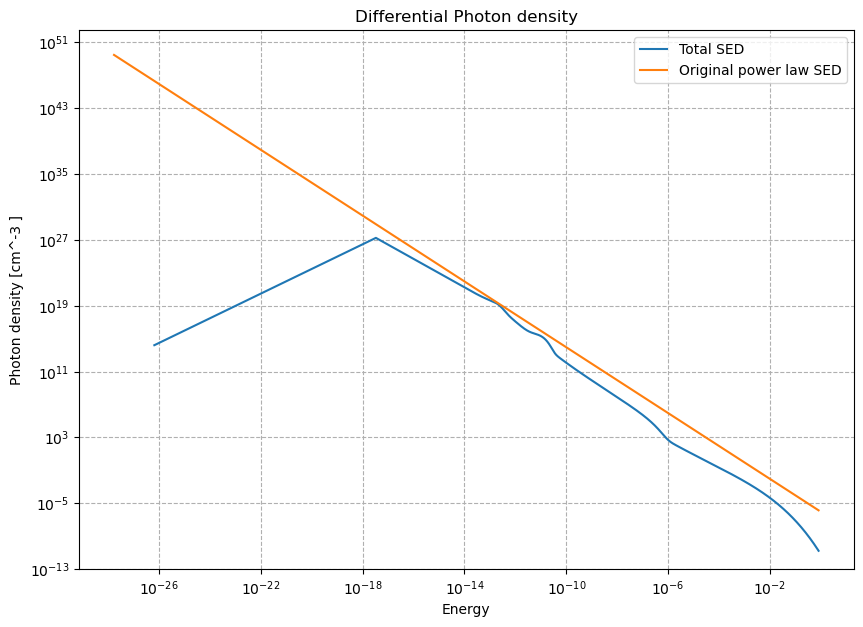

In [134]:
plt.figure(figsize=(10, 7))
plt.plot(nu_vals*const.h.cgs.value, u_tot_for_r/(nu_vals*const.h.cgs.value)**2, label='Total SED')
plt.plot(nu_vals*const.h.cgs.value,  n_eps_t_2(nu_vals*const.h.cgs.value, R, 10**43), label='Original power law SED')
plt.xlabel('Energy')
plt.ylabel('Photon density [cm^-3 ]')
plt.xscale('log')
plt.yscale('log')
plt.title('Differential Photon density')
plt.ylim(10**-13)
plt.legend()
plt.grid(True, which="both", ls="--")
#plt.savefig('C:/Users/henri/OneDrive/Documents/NTNU/Semester 10/Masteroppgave/Plots/Photon_density.png')
plt.show()

In [102]:
from scipy.integrate import dblquad
import numpy as np
## t_py, pion production time
def inelastisity (E):
    if E<980*m_e*c**2 and E>390*m_e*c**2:
        return 0.2
    elif E>980*m_e*c**2:
        
        return 0.6
    else:
        return 0
    
def cross_section_py (E):
    if E<980*m_e*c**2 and E>390*m_e*c**2:
       
        return 340*10**-30 #microb, i think this could be wrong. 
    elif E>980*m_e*c**2:
        return 120*10**-30  #microb cm^-2
    else:
        return 0
    
############################  List of integrands that represent the same function but with some variable change
    
def integrand(eta_t, eta_gamma,r_b,L_eps,gamma_p): #original
  
    #print(f"eta_t: {eta_t}, eta_gamma: {eta_gamma/(2*gamma_p)}")
    return  eta_t**(-2)*n_eps_t(eta_t, r_b,L_eps)*eta_gamma*inelastisity(eta_gamma)*cross_section_py(eta_gamma)

def integrand_2(eta_t, eta_gamma,r_b,L_eps,gamma_p): #make it logaritmic to avoid numerical errors
    return np.exp(eta_t)*np.exp(eta_gamma)*integrand(np.exp(eta_t), np.exp(eta_gamma),r_b,L_eps,gamma_p)



def integrand_3(eta_gamma, eta_t,r_b,L_eps,gamma_p): # integral swithced around
    return  eta_t**(-2)*n_eps_t(eta_t, r_b,L_eps)*eta_gamma*inelastisity(eta_gamma)*cross_section_py(eta_gamma)

def integrand_4(eta_gamma, eta_t,r_b,L_eps,gamma_p): # logaritmic to avoid numerical errors
    
    return  np.exp(eta_t)*np.exp(eta_gamma)*integrand_3(np.exp(eta_gamma), np.exp(eta_t),r_b,L_eps,gamma_p)

def integrand_5(eta_gamma, eta_t,r_b,L_eps,gamma_p): #integral swithced around and logaritmic to avoid numerical errors and another variable change y = e_t * gamma_p
    
    return  np.exp(eta_t)*np.exp(eta_gamma)*integrand_3(np.exp(eta_gamma), np.exp(eta_t)/gamma_p,r_b,L_eps,gamma_p)




########################

def n_eps_t(eps_t, r_b,L_eps):
     #Here i change r based on the energy of the proton, when it comes to it. 
    l = find_index( nu_vals*const.h.cgs.value,eps_t)
    #print(eps_t, u_tot_for_r[l]/(eps_t**2),n_eps_t_2(eps_t, r_b,L_eps))
    return u_tot_for_r[l]/(eps_t**2) #

def epsilon_r(eps, gamma_p):
    beta = np.sqrt(1-1/gamma_p**2)
    return eps*gamma_p#*(1-np.cos(theta)*beta), avg_theta = 0 




def t_py(E,r_b,L_eps):
    E_p = E*ev_to_erg
    #print(format_number(980*m_e*c**2/ev_to_erg), format_number(390*m_e*c**2/ev_to_erg))
    gamma_p = E_p/(m_p*c**2)
    #print(gamma_p)
    inf = 5e11 *ev_to_erg#/(m_e*c**2)
    bl = 145*10**6*ev_to_erg
    #print(bl, inf)
    #print(bl/(2*gamma_p), inf)
    
    #result, error = dblquad(integrand_3, bl/(2*gamma_p), inf, lambda x: bl, lambda x : x*2*gamma_p, args=(r_b,L_eps,gamma_p,)) #, one paper 
    result, error = dblquad(integrand_4, np.log(bl/(2*gamma_p)), np.log(inf), lambda x: np.log(bl), lambda x : x+np.log(2*gamma_p), args=(r_b,L_eps,gamma_p,), epsabs=1.49e-4, epsrel=1.49e-4) #second paper
    #result, error = dblquad(integrand_2, np.log(bl), np.log(inf), lambda x: np.log(bl)-np.log(gamma_p*2),  np.log(inf), args=(r_b,L_eps,gamma_p,), epsabs=1.49e-4, epsrel=1.49e-4) #foteini paper
    #result, error = dblquad(integrand_5, np.log(bl/(2*gamma_p)), np.log(inf), lambda x: np.log(bl), lambda x : x+np.log(2), args=(r_b,L_eps,gamma_p,), epsabs=1.49e-4, epsrel=1.49e-4) 

    #print(result, error)
    pion_timescale = c/(2*gamma_p**2)*result
    return pion_timescale





photo_pion_time = []
for E_i in tqdm(Energy_proton):
    photo_pion_time.append(t_py(E_i,R, 10**43))

photo_pion_time = np.array(photo_pion_time)


 76%|███████▌  | 76/100 [00:17<00:35,  1.48s/it]c:\Users\henri\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
 78%|███████▊  | 78/100 [01:05<04:30, 12.31s/it]c:\Users\henri\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
100%|██████████| 100/100 [17:43<00:00, 10.64s/it]


In [106]:
### Diffusive acceleration through gyroresonant interaction with alfen waves, 
xi_i = 0.1 #*1/((B)**2/(np.pi*8)) ##Spectral density of parallell waves of type i 
B_new = 0.01
#n_p = 10**-8
q = 5/3

gamma_e_avg = 51
n_e = 1/((gamma_e_avg-1)*(m_e*c**2)) *(B)**2/(np.pi*8)
print(n_e)

alpha_beta = 4*np.pi*m_e*c**2*n_e/B**2
beta_a2 = np.sqrt(m_e/(m_p*alpha_beta))


gamma_p_avg = 1.0276
n_p = 1/(gamma_p_avg-1)/(m_p*c**2) *(B)**2/(np.pi*8)
print(n_p)
n_p = 10**-4
v_a = B_new/np.sqrt(4*np.pi*n_p*m_p)
beta_a = v_a/c

print(beta_a,beta_a2)
def t_gyro_alf(q,gamma,beta_a,xi_i,t_dyn):
    return 2/np.pi*(q/(q-1))*t_dyn/(beta_a**2*xi_i)*gamma**(2-q)

def r_g(p,B):
    return p*c/(q*B)

def Diff_alf(p,beta_a,B,lambda_max):
    return beta_a**2*1*(r_g(p,B)/lambda_max)**(q-1)*p**2*c**2/r_g(p,B)/c

def t_gyro_alf_diff(E,beta_a,B,lambda_max):
    p = np.sqrt((E)**2/(m_p*c**2)**2)
    return p**2/Diff_alf(p,beta_a,B,lambda_max)
diff_acc_time = []

for E_i in tqdm(Energy_proton):
    
    diff_acc_time.append(t_gyro_alf(q,E_i*ev_to_erg/(m_p*c**2),beta_a,xi_i,dynamical_time))

diff_acc_time = np.array(diff_acc_time)


0.09719853842760419
0.0958985117592473
7.27571154534762 0.23337031119760412


100%|██████████| 100/100 [00:00<?, ?it/s]


In [107]:
n_p = 10**-4


v_a = B_new/np.sqrt(4*np.pi*n_p*m_p)
beta_a = v_a/c
print(R,beta_a)
beta_a = 7*10**-4
lambda_max = 0.1*R
def r_g(p,B):
    return p*c/(q*B)

def Diff_alf(p,beta_a,B,lambda_max):
    return beta_a**2*1*(r_g(p,B)/lambda_max)**(q-1)*p**2*c**2/r_g(p,B)/c

def t_gyro_alf_diff(E,beta_a,B,lambda_max):
    p = np.sqrt((E)**2/(m_p*c**2)**2)
    return p**2/Diff_alf(p,beta_a,B,lambda_max)

t_acc_diff =[]

for E_i in (Energy_proton):
    t_acc_diff.append(t_gyro_alf_diff(E_i*ev_to_erg,beta_a,B,lambda_max))

t_acc_diff= np.array(t_acc_diff)

9460800000000000000 7.27571154534762


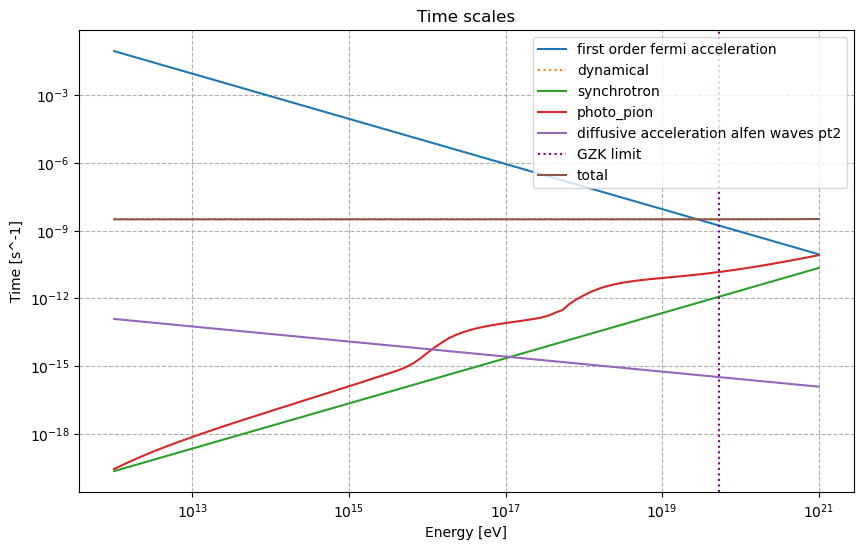

In [108]:

GZK_limit = 5*10**19
gzk_index = find_index(Energy_proton, GZK_limit)
plt.figure(figsize=(10, 6))
plt.plot(Energy_proton, 1/acceleration_time, label='first order fermi acceleration')
plt.plot(Energy_proton, 1/(dynamical_time*np.ones(len(Energy_proton))), label='dynamical', linestyle='dotted')
plt.plot(Energy_proton, 1/synchrotron_time, label='synchrotron')
plt.plot(Energy_proton, photo_pion_time, label='photo_pion')
#plt.plot(Energy_proton, 1/diff_acc_time, label='diffusive acceleration alfen waves')
plt.plot(Energy_proton, 1/t_acc_diff, label='diffusive acceleration alfen waves pt2')
plt.axvline(Energy_proton[gzk_index], color='purple', linestyle='dotted', label='GZK limit')
#print(1/synchrotron_time)
t_loss_inv = (1/dynamical_time*np.ones(len(Energy_proton))+1/synchrotron_time+photo_pion_time)
index = find_index(1/acceleration_time, t_loss_inv)
plt.plot(Energy_proton, t_loss_inv, label='total')
#plt.plot(Energy_proton, 5*10**3*60*60*24*365*np.ones(len(Energy_proton)), label = 'timescale')
#plt.axvline(Energy_proton[index], color='black', linestyle='dotted', label='Maks energy')

plt.xlabel('Energy [eV]')
plt.ylabel('Time [s^-1]')
plt.xscale('log')
plt.yscale('log')
plt.title('Time scales')
plt.legend()
plt.grid(True, which="both", ls="--")
#plt.savefig('C:/Users/henri/OneDrive/Documents/NTNU/Semester 10/Masteroppgave/Plots/Time_scales.png')
plt.show()
